In [4]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

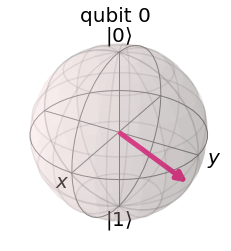

In [5]:
# CREACION DE UN QUBIT EN UN ESTADO ALEATORIO
psi = random_statevector(2)

plot_bloch_multivector(psi)

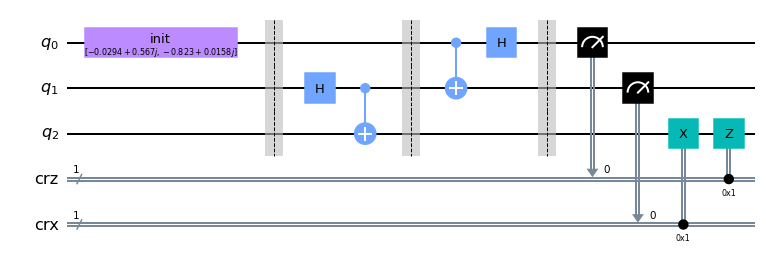

In [6]:
init_gate = Initialize(psi)
init_gate.label = "init"
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## PASO 1 INICIALIZACION DEL QUBIT QUE ALICE QUIERE TELETRANSPORTAR
qc.append(init_gate, [0])
qc.barrier()

## PASO 2 ENTRELAZAMOS LOS QUBITS
qc.h(1) 
qc.cx(1,2) 
qc.barrier()

## PASO 3 MEDICION DE BELL
qc.cx(0, 1)
qc.h(0)

## PASO 4 MEDICION EN LA BASE COMPUTACIONAL
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)

## PASO 5 CORRECCION DE LOS QUBITS DE BOB
qc.x(2).c_if(crx, 1) # Apply gates if the registers 
qc.z(2).c_if(crz, 1) # are in the state '1'

## IMPRIMIMOS EL RESULTADO
qc.draw()

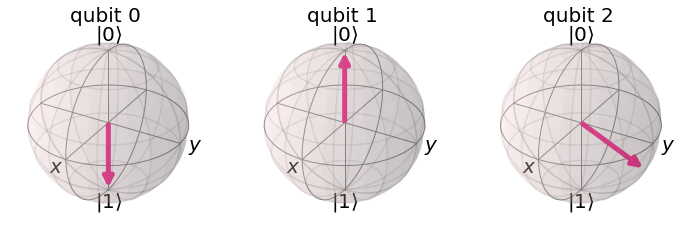

In [7]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)